In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
job_postings = pd.read_csv('job_postings.csv')
job_skills = pd.read_csv('job_skills.csv')
job_summary = pd.read_csv('job_summary.csv')

# Inspect data to understand structure
job_postings.head(), job_skills.head(), job_summary.head()

(                                            job_link  \
 0  https://www.linkedin.com/jobs/view/senior-mach...   
 1  https://www.linkedin.com/jobs/view/principal-s...   
 2  https://www.linkedin.com/jobs/view/senior-etl-...   
 3  https://www.linkedin.com/jobs/view/senior-data...   
 4  https://www.linkedin.com/jobs/view/lead-data-e...   
 
              last_processed_time   last_status got_summary got_ner  \
 0  2024-01-21 08:08:48.031964+00  Finished NER           t       t   
 1  2024-01-20 04:02:12.331406+00  Finished NER           t       t   
 2  2024-01-21 08:08:31.941595+00  Finished NER           t       t   
 3  2024-01-20 15:30:55.796572+00  Finished NER           t       t   
 4  2024-01-21 08:08:58.312124+00  Finished NER           t       t   
 
   is_being_worked                                     job_title  \
 0               f              Senior Machine Learning Engineer   
 1               f  Principal Software Engineer, ML Accelerators   
 2               f      

In [2]:
# Merge
merged_data = pd.merge(job_postings, job_skills, on='job_link', how='left')
merged_data = pd.merge(merged_data, job_summary, on='job_link', how='left')

# Checking merged structure
merged_data.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...


In [3]:

# Ensure all text fields are in lowercase to maintain consistency
merged_data['job_location'] = merged_data['job_location'].str.lower()
merged_data['job_level'] = merged_data['job_level'].str.lower()

# Handle NaN values 
merged_data['job_skills'] = merged_data['job_skills'].fillna('[]')

# Convert job_skills from comma-separated strings to lists
merged_data['job_skills'] = merged_data['job_skills'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Standardize skill names function
def standardize_skills_and_lowercase(skills_list):
    standardized_skills = [skill.lower().replace('communication skills', 'communication') for skill in skills_list]
    return standardized_skills

# Apply the standardization function to 'job_skills'
merged_data['job_skills'] = merged_data['job_skills'].apply(standardize_skills_and_lowercase)

# Filter for "mid Senior" positions and use a copy to avoid SettingWithCopyWarning
senior_jobs = merged_data[merged_data['job_level'].str.contains('mid senior', case=False, na=False)].copy()

# Explode and count skill frequencies for "mid senior" positions
senior_skills_list = senior_jobs.explode('job_skills')['job_skills'].value_counts().reset_index(name='count')

# Distribution of job levels across locations
job_location_distribution = merged_data.groupby(['job_location', 'job_level'])['job_link'].count().reset_index(name='count')

# Display results
print("Job Location Distribution (Top 10):")
print(job_location_distribution.head(10))

print("\nTop 20 Skills for 'Mid Senior' Positions:")
print(senior_skills_list.head(20))

Job Location Distribution (Top 10):
                              job_location   job_level  count
0  abbots salford, england, united kingdom  mid senior      2
1     abbotsford, british columbia, canada  mid senior      1
2                               abbott, tx   associate      1
3                               abbott, tx  mid senior      2
4              aberdeen proving ground, md  mid senior     10
5                             aberdeen, md  mid senior      6
6       aberdeen, scotland, united kingdom  mid senior      7
7                             abington, ma  mid senior      1
8                         acoma pueblo, nm  mid senior      1
9                                  ada, ok  mid senior      1

Top 20 Skills for 'Mid Senior' Positions:
            job_skills  count
0               python   4403
1                  sql   4144
2        communication   3722
3        data analysis   2836
4     machine learning   2440
5   data visualization   2025
6                  aws   1636

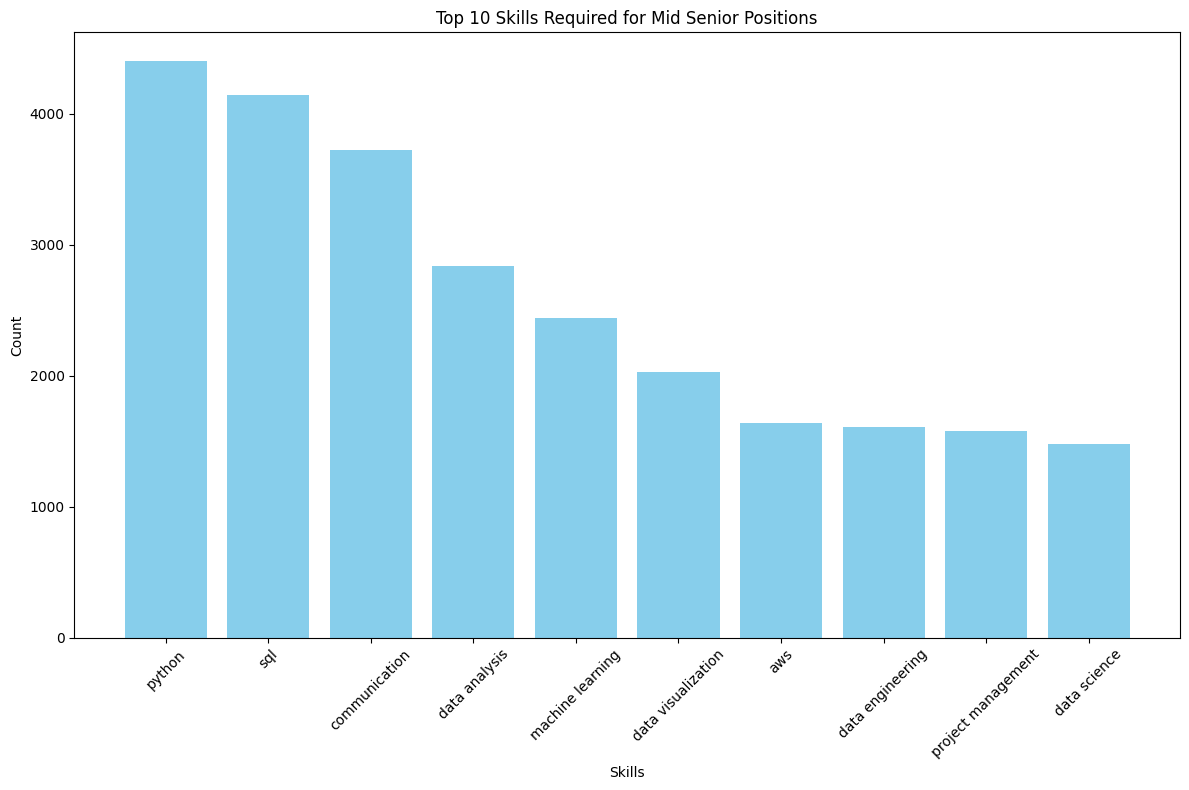

In [4]:
# Top 10 skills for senior positions
top_skills = senior_skills_list.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_skills['job_skills'], top_skills['count'], color='skyblue')
plt.title('Top 10 Skills Required for Mid Senior Positions')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [5]:
# Cleaning US location data
merged_data['state'] = merged_data['job_location'].apply(lambda x: x.split(', ')[-1] if isinstance(x, str) and ',' in x and len(x.split(', ')[-1]) == 2 else None)

# Count the number of job offers in each state 
jobs_by_state = merged_data.groupby('state')['job_link'].count().reset_index(name='count').sort_values(by='count', ascending=False)
jobs_by_state

,state,count
4,ca,1299
43,tx,861
45,va,687
34,ny,550
14,il,445
31,nj,415
38,pa,401
9,fl,391
19,ma,389
35,oh,372


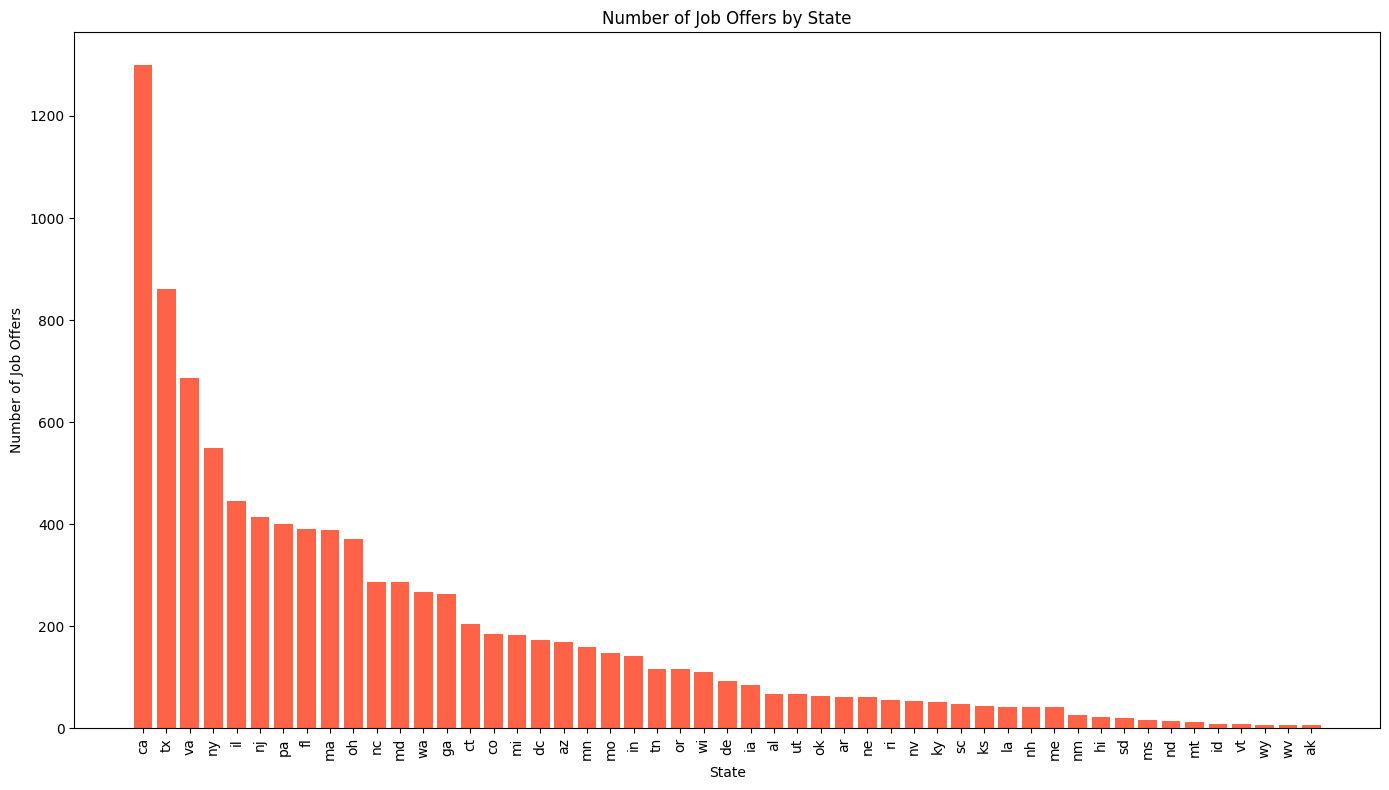

In [6]:
# Number of Job Offers By State
plt.figure(figsize=(14, 8))
plt.bar(jobs_by_state['state'], jobs_by_state['count'], color='tomato')
plt.title('Number of Job Offers by State')
plt.xlabel('State')
plt.ylabel('Number of Job Offers')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.show()